In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

path = '../output_data/'

In [2]:
with pd.HDFStore(path + 'X1a.h5') as store:
    data = store.select('dat_1', where='phi=0.5', columns=['decision state', 'i_c', 'G'])
data.index = data.index.droplevel(['phi', 'test'])
data = data.reset_index('tstep')
data = data.reset_index().drop_duplicates(['n_rn', 'n_cp', 'sample', 'tstep']).set_index(['n_rn', 'n_cp', 'sample', 'tstep'])

In [3]:
ix1 = data.index

a = list(ix1.levels[0])
b = list(ix1.levels[1])
c = list(ix1.levels[2])

ix2 = pd.MultiIndex.from_product([a, b, c],
                                 names=('n_rn', 'n_cp', 'sample'))

In [5]:
res1 = pd.DataFrame(index = ix2)

for i, j, k in product(a, b, c):
    
    tmp = data.xs(level=('n_rn', 'n_cp', 'sample'), key=(i, j, k)).reset_index()[['decision state', 'tstep', 'G']]
    t = None
    for _, row in tmp.iterrows():
        if row['decision state'] > .7 and t is None:
            t = row['tstep']
            G = row['G']
    if t is not None:
        if t < 5:
            t = None
    res1.loc[(i, j, k), 't'] = t
    res1.loc[(i, j, k), 'G'] = G
res1.unstack('sample')

t                                                        \
sample       0     1     2     3     4     5     6     7     8     9    
n_rn n_cp                                                               
0    0      8.0   9.0   8.0   8.0   8.0   8.0   8.0   8.0   8.0   8.0   
     3      8.0   8.0   8.0   8.0   5.0   8.0   8.0   8.0   8.0   7.0   
     6      7.0   6.0   7.0   7.0   7.0   7.0   6.0   7.0   7.0   8.0   
     9      6.0   NaN   NaN   NaN   NaN   7.0   6.0   NaN   NaN   7.0   
     12     6.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     15     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     18     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     21     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     24     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3    0      8.0   8.0   8.0   8.0   8.0   8.0   8.0   8.0   8.0   9.0   
     3      8.0   8.0   8.0   8.0   8.0   8.0   7.0   7.0   8.0   8.0   
     6      6.0   7.0   7.0   7.0   7.0   7.0   7.0   5.0   7.0   6.0   
     9      5.0   7.0   6.0   NaN   NaN   NaN   7.0   NaN   8.0   6.0   
     12     NaN   NaN   6.0   6.0   6.0   6.0   NaN   NaN   NaN   NaN   
     15     NaN   NaN   6.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     18     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     21     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     24     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6    0      8.0   9.0   8.0   8.0   9.0   7.0   9.0   8.0   8.0   8.0   
     3      8.0   8.0   8.0   7.0   8.0  11.0   8.0   9.0   7.0   8.0   
     6      7.0   8.0   7.0   6.0   NaN   7.0   7.0   8.0   NaN   NaN   
     9      7.0   8.0   7.0   NaN   NaN   7.0   7.0   6.0   7.0   7.0   
     12     NaN   6.0   6.0   NaN   6.0   6.0   NaN   6.0   NaN   NaN   
     15     6.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     18     NaN   NaN   6.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     21     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     24     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
9    0      9.0   9.0   8.0   9.0   8.0   9.0  12.0   9.0  11.0   9.0   
     3      8.0   7.0   7.0   7.0   7.0   8.0   8.0   7.0   8.0   9.0   
     6      6.0   5.0   7.0   8.0   7.0   8.0   7.0   7.0   NaN   9.0   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
21   18     7.0   6.0   6.0   6.0   6.0   6.0   6.0   5.0   6.0   6.0   
     21     6.0   NaN   NaN   6.0   NaN   6.0   6.0   6.0   5.0   6.0   
     24     NaN   5.0   NaN   NaN   6.0   6.0   5.0   6.0   NaN   5.0   
22   0     12.0   9.0   9.0   8.0   9.0  21.0   9.0  11.0   9.0  19.0   
     3     12.0   8.0   8.0   8.0   8.0  17.0   8.0   8.0   8.0   9.0   
     6      8.0   7.0   8.0   8.0   NaN   8.0   8.0   9.0  10.0   8.0   
     9      7.0   7.0   9.0   8.0   7.0   7.0  11.0  16.0   7.0   7.0   
     12     7.0   8.0   6.0   7.0   7.0   6.0   6.0   7.0   7.0   7.0   
     15     6.0   7.0   7.0   6.0   7.0   7.0   7.0   7.0   7.0   6.0   
     18     6.0   NaN   NaN   6.0   7.0   NaN   6.0   6.0   7.0   7.0   
     21     5.0   5.0   6.0   6.0   NaN   6.0   6.0   6.0   6.0   NaN   
     24     NaN   NaN   6.0   6.0   NaN   NaN   6.0   NaN   NaN   6.0   
24   0     12.0  10.0   9.0  13.0  14.0  11.0  14.0  14.0  12.0   9.0   
     3      8.0   8.0   9.0  10.0   8.0   9.0  15.0   8.0   8.0   9.0   
     6      9.0   8.0   8.0   8.0   8.0   8.0   7.0   8.0   7.0  18.0   
     9      7.0   7.0   8.0   9.0   7.0   7.0   7.0   7.0   7.0   7.0   
     12     7.0   7.0   7.0   7.0   6.0   7.0   8.0   7.0   7.0   8.0   
     15     7.0   7.0   6.0   6.0   7.0   7.0   6.0   7.0   7.0   7.0   
     18     5.0   7.0   6.0   NaN   7.0   6.0   6.0   6.0   6.0   6.0   
     21     6.0   NaN   6.0   6.0   6.0   5.0   6.0   5.0   6.0   6.0   
     24     6.0   6.0   NaN   5.0   5.0   5.0   6.0   6.0   6.0   NaN   

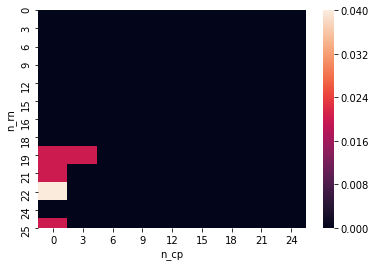

In [6]:
import seaborn as sn

g_max = data['G'].max()

plt_res = (res1['G']<g_max*(3./4.)).unstack('sample').sum(axis=1).unstack('n_cp')/50

sn.heatmap(plt_res)

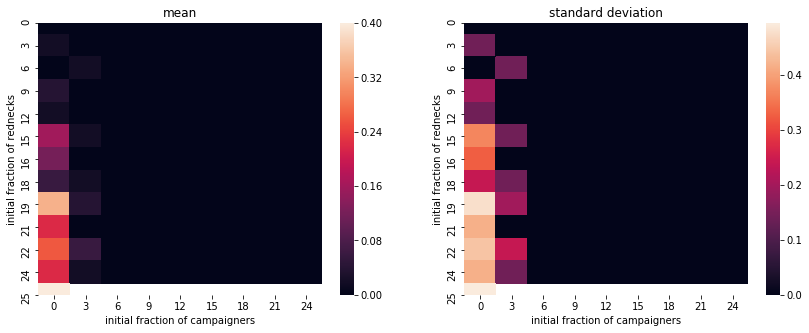

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))

plt_mean = (data.xs(level='tstep', key=100)['G'].unstack('sample')<g_max*(.75)).mean(axis=1).unstack('n_cp')
plt_std = (data.xs(level='tstep', key=100)['G'].unstack('sample')<g_max*(.75)).std(axis=1).unstack('n_cp')

sn.heatmap(plt_mean,
          ax=axes[0])

sn.heatmap(plt_std,
          ax=axes[1])

for ax, title in zip(axes, ['mean', 'standard deviation']):
    ax.set_xlabel('initial fraction of campaigners')
    ax.set_ylabel('initial fraction of rednecks')
    ax.set_title(title)

fig.savefig('prob_75pc_rec_left_in_2100.pdf')

In [ ]:
res2 = pd.DataFrame(index = ix2)

for i, j, k in product(a, b, c):
    
    tmp = data.xs(level=('n_rn', 'n_cp', 'sample'), key=(i, j, k)).reset_index()[['decision state', 'tstep', 'G']]
    
    t = None
    for _, row in tmp.iterrows():
        if row['decision state'] > .7 and t is None:
            t = row['tstep']
            G = row['G']
    if t is not None:
        if t < 5:
            t = None
    res1.loc[(i, j, k), 't'] = t
    res1.loc[(i, j, k), 'G'] = G
res.unstack('sample')

In [ ]:
plt_res

In [ ]:
with pd.HDFStore(path + 'X1a.h5') as store:
    data = store.select('dat_2', where='phi=0.5')
data.index = data.index.droplevel(['phi', 'test', 'i'])

In [ ]:
data = data.reset_index()

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
data['G'].unstack(['n_rn', 'n_cp', 'sample']).plot(legend=False,
                                                  ax=axes[0],
                                                  color='k',
                                                  alpha=0.2)

In [ ]:
data['G'].max()*(.7)